## AutoScout Project Solution - PostClass

### 1. Import Modules, Load Data and Data review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [5]:
df2 = df.copy()

### Feature Engineering

In [6]:
df.select_dtypes(include="object")

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,New,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Metallic,Part/Full Leather,Automatic,front
15911,Renault Espace,Van,VAT deductible,Used,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Cloth,Automatic,front
15912,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Part/Full Leather,Automatic,front
15913,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Metallic,Part/Full Leather,Automatic,front


In [7]:
df_object = df.select_dtypes(include="object").head()
df_object

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [8]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [9]:
df["make_model"].value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

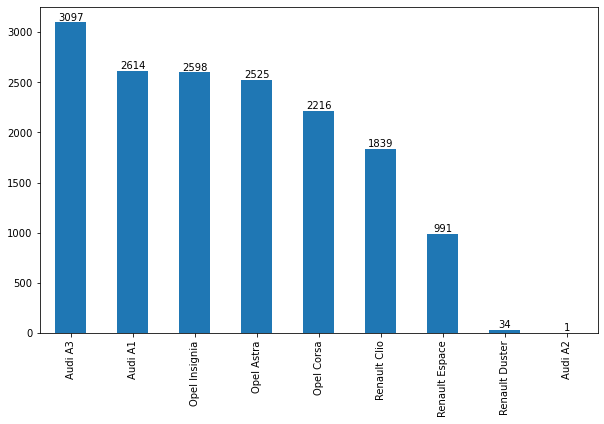

In [10]:
ax = df["make_model"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0]);

In [11]:
#Burad data içinde sadece bir adet Audi A2 olduğunu görüyoruz.
# Audi A2 için modelimizi eğitecek kadar veri yok o yüzden bunu düşeceğiz.
# Bir sütunda 20'den az veri varsa o sütun düşülebilir.

In [12]:
df[df["make_model"] == "Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [13]:
df.drop(index=[2614], inplace=True)

In [14]:
df.shape

(15914, 23)

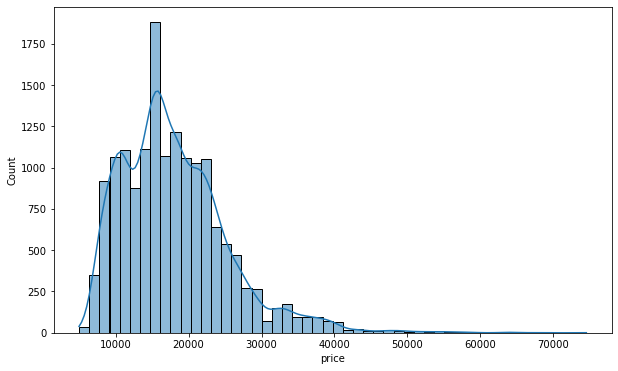

In [15]:
sns.histplot(df["price"],bins=50, kde=True);

In [16]:
skew(df["price"])
# -0.5 ile 0.5 arası skewness mükemmel normal dağılımı temsil eder.
# -1 ile 1 aralığından uzaklaşırsa normal dağılımndan uzaklaşır.
# Burada bir miktar right skewness durumu var.

1.236330745564795

In [17]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400
15912,39875,15.000,6.000,0.000,1.000,146.000,1,1997.000,1734.000,5.300
15913,39700,10.000,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300


<AxesSubplot:>

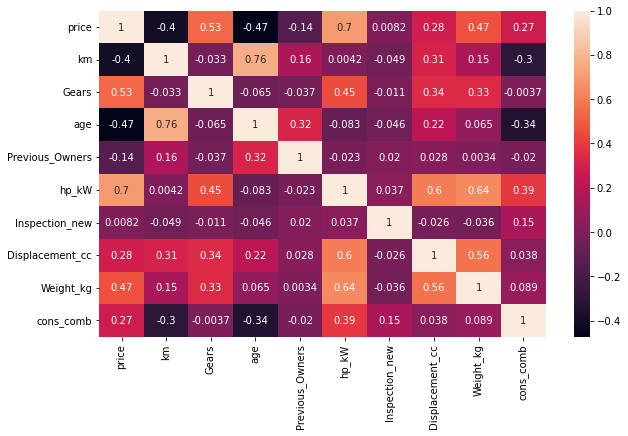

In [18]:
sns.heatmap(df_numeric.corr(), annot=True)

### Multicollinearity Control 

In [19]:
df_numeric.corr()[(df_numeric.corr() >= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [20]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any().any()

False

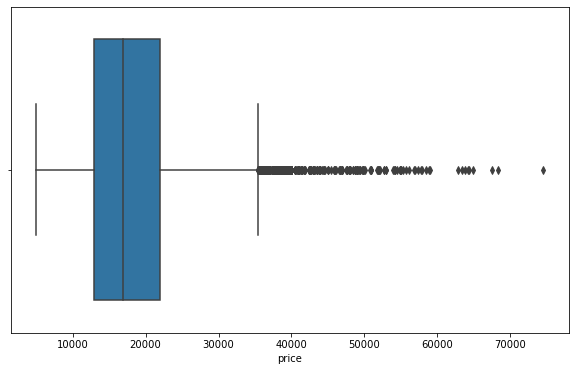

In [21]:
sns.boxplot(df["price"]);

In [22]:
# Burada price sütununda çok sayıdı extreme değer var ancak bunları marka model bağlamında ve domain knowledge kullanarak
# değerlendirmeden bu extreme değerlerin outlier olduğunu söyeyemeyiz

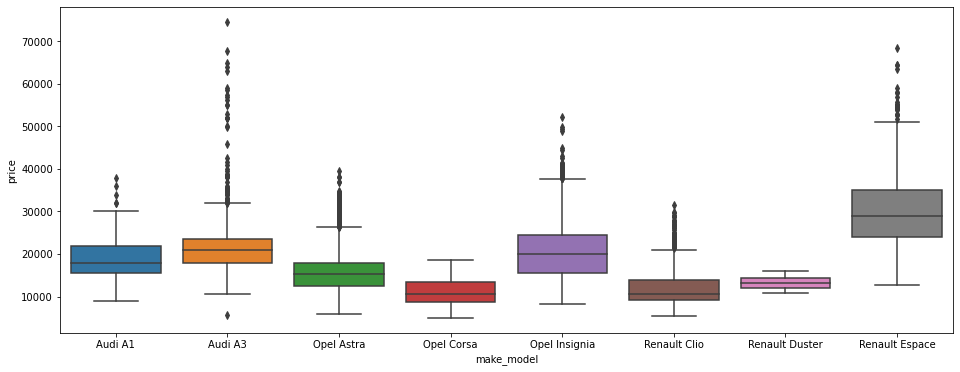

In [23]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5);

In [24]:
# Opel corsa, ve Renault Duster için extreme değer yok gözüküyor.
# Ayrıca burda 1.5 IQR' a göre hesaplama yapılıyor. Bu IQR değeri değiştirilebilir.

In [25]:
total_outliers = []

for model in df["make_model"].unique():
    car_prices = df[df["make_model"] == model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers / len(df[df['make_model'] == model])).round(3)}")
print()
print("Total_outliers : ", sum(total_outliers), "The rate of outliers : ", (sum(total_outliers) / len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of outliers :  0.026


In [26]:
# Yukarıdaki çıktıyı değerlendirdiğimizde Toplam extreme değerlerimizin bütün dataya oranı sadece %2.6 çıktı.
# Bunları make model olarak bakınca daha da düşük çıkıyor.
# Yani bu extreme değerleri outlier olarak kabul edip düşmek çok bir veri kaybına sebep olmayacak.

## Data Pre-Processing 

### Train - Test Split

In [27]:
X = df.drop(columns="price")
y = df["price"]

In [28]:
def trans_1(X, y, test_size = 0.2, random_state = 101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # Burada get_dummies yapmadan önce datayı Test-Train split yaptık. Amacımız Data Leakage'i önlemek.
    
    X_train = X_train.join(X_train["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
        
    X_test = X_test.join(X_test["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value = 0)
    # Burada X_test' teki sütunları X_train'deki sütunlarla aynı sıralamaya getiriyoruz.
    # Ve eğer trainde olan ama test'te olmayan bir değer görürse 0 yapsın diyoruz.
    
    X_train.drop(columns=["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], inplace = True)
    X_test.drop(columns=["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], inplace = True)
    # Burada artık dummy sonrası işimiz kalmayan sütunları düşüyoruz.
    
    return X_train, X_test, y_train, y_test

In [29]:
# Dummies yapmak için model tüm datayı dolaşır ve tüm unique categoric verileri tespit eder.
# Eğer tüm dataya get_dummmies uygulayıp sonradan test-train olarak ayırırsanız, train seti, test setindeki
# gözlemlerde hangi categoric değerler olduğu bilgisne sahip olur.
# Bu da skorlarımızda yalancı bir iyileştirme yapabilir.
# Bunun önüne geçmek için train ve test setine ayrı ayrı get_dummy uyguluyoruz.
# get_dummies pandas'a ait bir fonksiyon olduğu için ML için kullanırken yukarıdaki gibi bir fonks. tanımlamak zorundayız.
# ML için one hot encoding tercih edilir ve Sklearn tabanlıdır. Birazdan onu göstereceğiz.

### Example for Reindex 

In [30]:
train = {"a" : [1, 2], "b" : [2, 3], "c" : [1, 4], "d" : [2, 4], "e" : [5, 6]}
test = {"e" : [1, 2], "c" : [2, 3], "a" : [1, 4], "d" : [2, 4]}

train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,a,b,c,d,e
0,1,2,1,2,5
1,2,3,4,4,6


In [31]:
test

,e,c,a,d
0,1,2,1,2
1,2,3,4,4


In [32]:
test.reindex(columns = train.columns, fill_value = 0)
# Görüldüğü gibi test dataframe' nin sütunlarının sıralaması train dataframe ile aynı oldu.
# train'de olup test'te olmayan sütun için de 0 değeri verdi.

,a,b,c,d,e
0,1,0,2,2,1
1,4,0,3,4,2


In [33]:
X_train, X_test, y_train, y_test = trans_1(X, y) # test_size = 0.2, random_stat = 101 default fonksiyon değerleridir.

In [34]:
X_train.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,Opel Insignia,Station wagon,VAT deductible,79640.000,Used,Diesel,6.000,2.000,1.000,125.000,0,Metallic,Cloth,Manual,1956.000,1733.000,front,4.500,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,Opel Corsa,Sedans,VAT deductible,129617.000,Used,Diesel,5.000,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1398.000,1163.000,front,5.300,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,Opel Insignia,Sedans,VAT deductible,16300.000,Used,Diesel,6.000,2.000,1.000,100.000,1,Metallic,Cloth,Manual,1598.000,1503.000,front,4.200,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7602,Opel Astra,Station wagon,VAT deductible,10350.000,Demonstration,Diesel,6.000,0.000,1.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1536.000,front,5.100,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4210,Audi A3,Station wagon,VAT deductible,26450.000,Used,Diesel,6.000,2.000,1.000,81.000,0,Metallic,Cloth,Manual,1598.000,1365.000,front,4.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1


### OneHotEncoder for X_train and X_test

##### X_train

In [35]:
cat = X_train.select_dtypes("object").columns
cat = list(cat)
# categoric column'lar üzerinden one hot encoding yapacağım ve sonra numeric sütunlar ile join edeceğim.

In [36]:
enc = OneHotEncoder(handle_unknown = "ignore", sparse=False)
# sparse : bool, default=True, Will return sparse matrix if set True else will return an array.
# 'ignore' : When an unknown category is encountered during transform, 
  # the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform,
  # an unknown category will be denoted as None.

X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index,
                           columns = enc.get_feature_names_out(cat))
X_train_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
11613,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
9040,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
11639,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
7602,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
4210,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
8007,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000


In [37]:
enc.fit_transform(X_train[cat])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
enc.get_feature_names_out(cat)

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'vat_Price negotiable', 'vat_VAT deductible',
       'Type_Demonstration', "Type_Employee's car", 'Type_New',
       'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [39]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new
# categoric sütunları one hot encoding ytaptıktan sonra numeric sütunlar ile join ettik ve Train datasını oluşturduk.

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,79640.000,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.500,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,129617.000,5.000,3.000,1.000,55.000,0,1398.000,1163.000,5.300,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,16300.000,6.000,2.000,1.000,100.000

##### X_test

In [40]:
# Yukarıda yaptığımız işlemlerin aynısını(bir istisna ile) burada X_test için yapacağız.
# Yukarıda fit_transform yapıpı kalıbı çıkarttık bu yüzden burda sadece transfrom yapacağız.
# Test datasına fit yaparsak data leakage olur !

In [41]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names_out(cat))
X_test_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
15079,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
13097,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
11349,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
2668,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
12668,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
12699,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
7491,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4945,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000


In [42]:
X_test.select_dtypes("number")

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,49606.000,6.000,2.000,2.000,147.000,0,1618.000,1734.000,6.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,100.000,6.000,1.000,1.000,88.000,1,1197.000,1087.000,5.400,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,11000.000,6.000,1.000,1.000,121.000,1,1490.000,1503.000,6.000,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2668,58000.000,7.000,3.000,1.000,81.000,0,1598.000,1365.000,3.700,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1
12668,7.000,6.000,0.000,1.000,121.000,0,1490.000,1522.000,6.500,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,3500.000,5.000,0.000,1.000,66.000,0,1398.000,1163.000,5.500,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
12699,1.000,6.000,0.000,0.000,122.000,0,14

In [43]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,49606.000,6.000,2.000,2.000,147.000,0,1618.000,1734.000,6.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,100.000,6.000,1.000,1.000,88.000,1,1197.000,1087.000,5.400,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,11000.000,6.000,1.000,1.000,121.000,1

In [44]:
# X_test categoric verileri one hot encoding yaptık ve tekrar numeric verilerle join ederek son haline getirdik.

In [45]:
def trans_2(X_train, X_test):
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    # Burada handle_unkown = ignore olması, daha önce görmediği bir veri gelirse görmezden gelecek. Hata vermeyecek.
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index,
                               columns = enc.get_feature_names_out(cat))
    
    X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index,
                              columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    return X_train, X_test

# Burada yukarıda manuel olarak yaptığımız işlemler için bir fonksiyon tanımladık.
# Böylelikle one hot encoding işlemlerimizi tek seferde kolay bir şekilde yapacağız.

In [46]:
X_train, X_test = trans_2(X_train, X_test)
# Burada fonksiyonu kullandık.

In [47]:
X_train.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,79640.000,6.000,2.000,1.000,125.000,0,1956.000,1733.000,4.500,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,129617.000,5.000,3.000,1.000,55.000,0,1398.000,1163.000,5.300,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,16300.000,6.000,2.000,1.000,100.000

In [48]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,49606.000,6.000,2.000,2.000,147.000,0,1618.000,1734.000,6.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,100.000,6.000,1.000,1.000,88.000,1,1197.000,1087.000,5.400,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,11000.000,6.000,1.000,1.000,121.000,1

In [49]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]
# burada train datasının tamamındaki sütunların price ile korelasyonuna baktık.
# sondaki -1 price' ın kendisi ile corelasyon' unu görmek istemediğimiz için yazıldı.

In [50]:
corr_by_price

age                                        -0.478
Gearing_Type_Manual                        -0.433
km                                         -0.404
Upholstery_type_Cloth                      -0.388
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.372
make_model_Renault Clio                    -0.295
body_type_Compact                          -0.196
Drive_chain_front                          -0.160
Previous_Owners                            -0.145
make_model_Opel Astra                      -0.130
em_CD player                               -0.094
vat_Price negotiable                       -0.093
em_On-board computer                       -0.078
ss_Central door lock with remote control   -0.072
ss_Fog lights                              -0.055
Paint_Type_Perl effect                     -0.049
body_type_Sedans                           -0.049
ss_Central door lock                       -0.045
ss_Isofix                                  -0.040


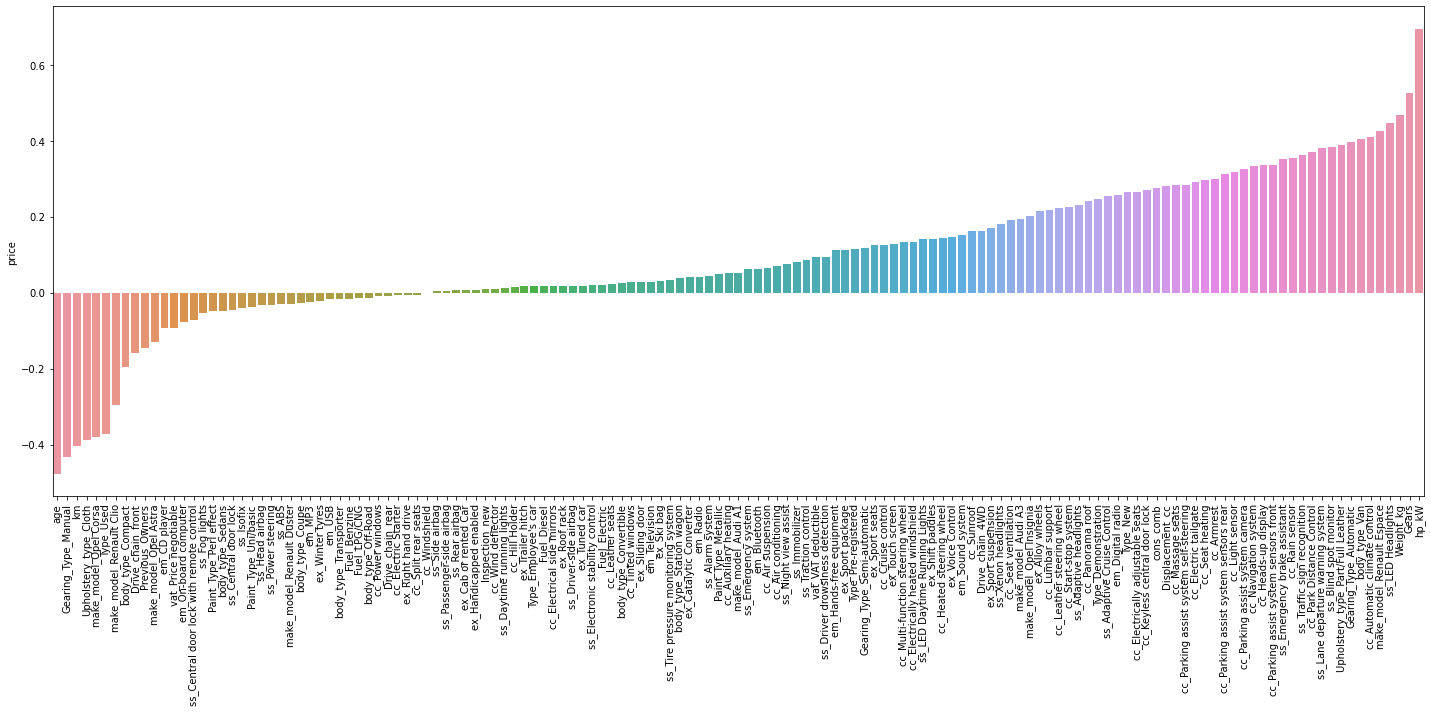

In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout()
# Burada korelasyonların görselleştrilmiş haline bakıyoruz.
# Price ile korelasyonu düşük olan hatta hiç olmayan sütunlar olduğunu görmüş olduk.

### 3. Implement Linear Regression
- Import the modul
- Fit the model
- Predict the test set
- Determine feature coefficient
- Evaluate model performance ( use perfomance metrice for regression and cross_val_score )
- Compare different evaluation metrics

In [52]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [53]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [54]:
train_val(linear_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [55]:
# Linear Regression özelinde feature sayısı arttık.ça R2_score'da yalancı bir iyileşme olduğu için ve
# biz de one hot encoding ile dummy yaparak feature sayımızı artırdığımız için adjusted_r2 score'a bakmak gerekecektir.

##### Adjusted R2 Score

In [56]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [57]:
y_pred = linear_model.predict(X_test)

In [58]:
adj_r2(y_test, y_pred, X)
# Burada skor'umuz değişmedi  ama bu başka datalarda değişmeyeceği anlamına gelmez.

0.8903421031389981

##### Cross Validate

In [59]:
# Datanın her yerinden veri alıp skorumuzu netleştirmek istiyoruz.
# Yukarıda sadece belli bir kısımdan veri alarak puan hesaplamıştık.

In [60]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv=10)

# Cross validation öncesi modeli sıfırlamak iyidir. Bunu genel alışkanlık haline getirmek lazım.

In [61]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.053,0.010,0.888,-1671.830,-5420159.539,-2328.124
1,0.050,0.000,0.884,-1776.103,-6233395.322,-2496.677
2,0.050,0.000,0.889,-1740.004,-6098855.314,-2469.586
3,0.050,0.010,0.883,-1737.442,-6939644.084,-2634.320
4,0.050,0.000,0.890,-1737.987,-6466406.057,-2542.913
5,0.060,0.000,0.886,-1724.773,-6485380.214,-2546.641
6,0.055,0.000,0.886,-1733.664,-5886688.695,-2426.250
7,0.050,0.000,0.901,-1680.942,-5563552.893,-2358.718
8,0.050,0.010,0.874,-1755.679,-7249552.942,-2692.499
9,0.060,0.007,0.881,-1740.491,-6141612.021,-2478.228


In [62]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1729.891
test_neg_mean_squared_error        -6248524.708
test_neg_root_mean_squared_error      -2497.396
dtype: float64

In [63]:
train_val(linear_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [64]:
# Cross validation öncesi ve sonrası skorları karşılaştırınca skore' umuzun düştüğünü görüyoruz.
# Cross validation sonrası çıkan score daha doğrudur. Score' umuz 0.886

In [65]:
2405 / df["price"].mean()
# RMSE skorlarına bakarken ve karşılaştırırken oranlarının birbiri ile karşılaştırılması gerekir.
# Burada % 13 hata oranımız var price için.

0.13343511633590033

##### Prediction Error 

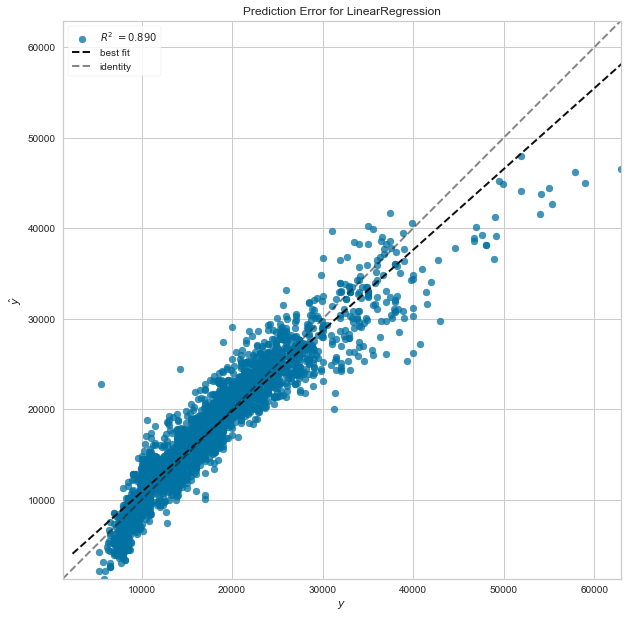

In [66]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

In [67]:
# Burada grafiğe bakınca data setindeki extreme değerlerin bizim best fitimizi  normalden uzaklaştırdığını görüyoruz.

##### Residual Plot

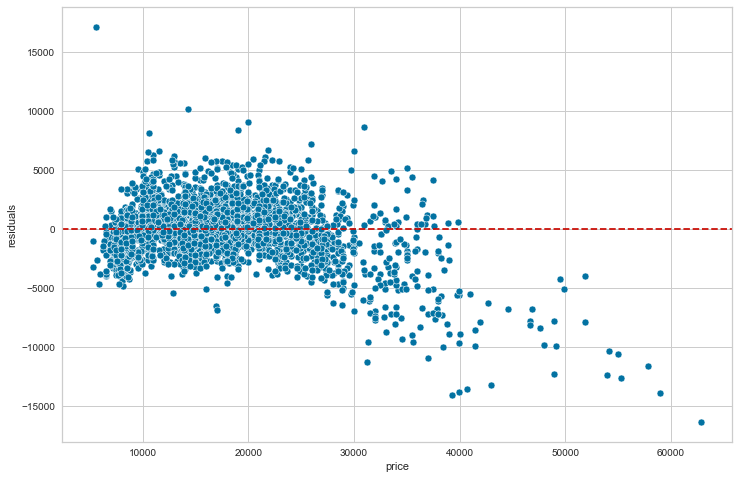

In [72]:
plt.figure(figsize=(12,8))
residuals = y_test - y_pred

sns.scatterplot(x=y_test, y = -residuals)
plt.axhline(y = 0, color="r", linestyle="--")
plt.ylabel("residuals");

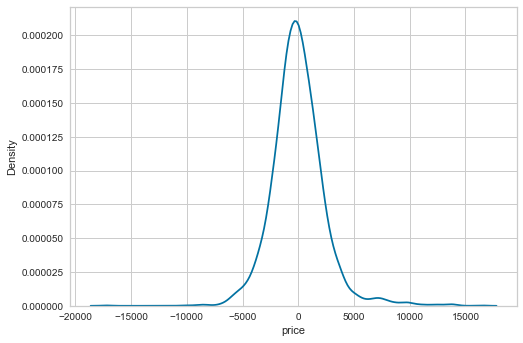

In [74]:
sns.kdeplot(residuals);

In [76]:
skew(residuals)
# Hataların normal dağılım gösterdiğini söyleyebiliriz.

0.8803469046681253

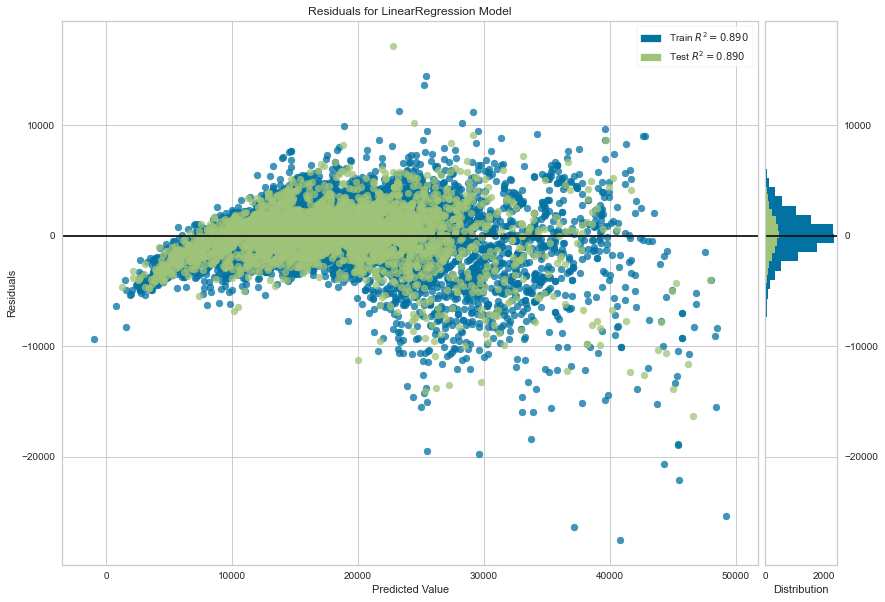

In [79]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

##### Dropping Outliers that Worsen My Predictions From the Dataset

In [81]:
for model in df["make_model"].unique():
    car_prices = df2[df2["make_model"] == model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    drop_index = df2[df2["make_model"] == model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace = True)
df2.shape

(15422, 23)

In [82]:
df2[df2["make_model"] == "Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [83]:
df2.drop(index=[2614], inplace=True)

In [84]:
df2.reset_index(drop=True, inplace=True)

In [85]:
df3 = df2.copy()

In [86]:
X = df2.drop(columns= "price")
y = df2.price

X_train, X_test, y_train, y_test = trans_1(X, y)
X_train, X_test = trans_2(X_train, X_test)

In [87]:
X_train.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,20.000,6.000,1.000,1.000,118.000,0,1598.000,1734.000,4.700,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0
9137,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,12099.000,6.000,1.000,1.000,66.000,1,1400.000,1163.000,6.000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0
7458,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,23950.000,6.000,1.000,1.000,81.000,0,159

In [89]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
5596,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,43.000,6.000,0.000,1.000,85.000,0,1598.000,1365.000,4.400,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0
1493,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,20407.000,5.000,1.000,1.000,66.000,0,1422.000,1345.000,4.100,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
4049,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,41000.000,6.000,1.000,1.000,85.000,0,1598.

In [90]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train, y_train)

LinearRegression()

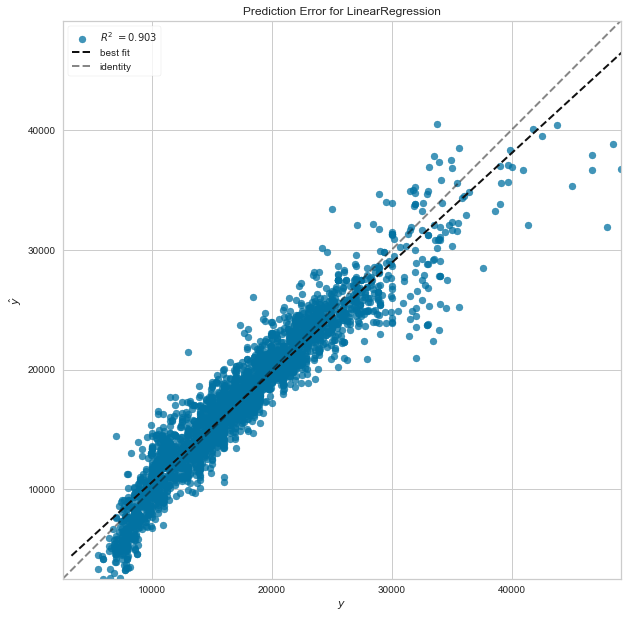

In [91]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [92]:
# Burada extreme değerleri outlier olarak değerlendirip attıktan sonra skorda bir iyileşme ve
# çizgiler arasındaki farkta bir kapanma görüyoruz.

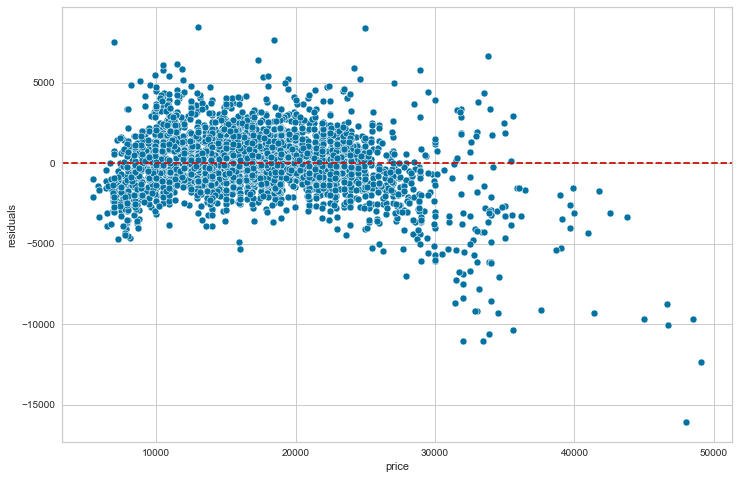

In [93]:
plt.figure(figsize=(12 ,8))
y_pred = linear_model_2.predict(X_test)
residuals = y_test - y_pred

sns.scatterplot(x = y_test, y = -residuals)
plt.axhline(y = 0, color = "r", linestyle="--")
plt.ylabel("residuals")
plt.show()

In [94]:
train_val(linear_model_2, X_train, y_train, X_test, y_test)

,train,test
R2,0.904,0.903
mae,1487.356,1429.305
mse,4309807.254,3959622.326
rmse,2076.008,1989.880


     train	      test       # Extreme değerleri atmadan önceki skorları görüyorsunuz.
R2	 0.890	      0.890
mae	 1705.452	  1705.217     
mse	 6038122.231  5785150.711
rmse 2457.259	  2405.234


In [97]:
1989 / df2["price"].mean()

0.11371928724980654

In [98]:
2405 / df["price"].mean()

0.13343511633590033

In [99]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)

In [102]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.909,-1469.091,-4102884.953,-2025.558
2,0.907,-1456.689,-4066888.475,-2016.653
3,0.893,-1609.773,-5309624.216,-2304.262
4,0.909,-1449.470,-3819070.231,-1954.244
5,0.897,-1506.859,-4528877.694,-2128.116
6,0.894,-1582.397,-5199225.320,-2280.181
7,0.896,-1470.122,-4215828.497,-2053.248
8,0.904,-1494.371,-4528342.022,-2127.990
9,0.905,-1493.638,-4156993.597,-2038.871
10,0.897,-1539.497,-4531591.226,-2128.753


In [103]:
scores = scores.iloc[:, 2:].mean()
scores

test_r2                                   0.901
test_neg_mean_absolute_error          -1507.191
test_neg_mean_squared_error        -4445932.623
test_neg_root_mean_squared_error      -2105.788
dtype: float64

In [104]:
y_pred = linear_model_2.predict(X_test)

linear_model_2_R2 = r2_score(y_test, y_pred)
linear_model_2_mae = mean_absolute_error(y_test, y_pred)
linear_model_2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [105]:
my_dict = {"Actual" : y_test, "Pred" : y_pred, "Residual" : y_test - y_pred }
compare = pd.DataFrame(my_dict)

In [109]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
11091,21800,22349.874,-549.874
6749,12950,11431.369,1518.631
6442,10900,8942.038,1957.962
9478,14598,14190.757,407.243
736,28290,27700.186,589.814
10458,14990,16383.501,-1393.501
7478,13900,15087.222,-1187.222
14998,32900,28807.360,4092.640
7065,18900,21017.095,-2117.095
14044,10790,13041.704,-2251.704


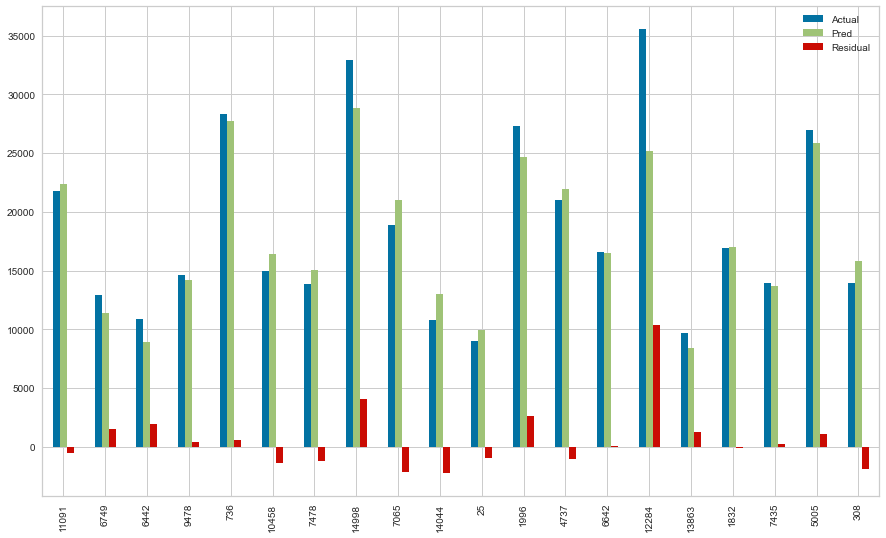

In [110]:
comp_sample.plot(kind = "bar", figsize=(15,9));

In [111]:
pd.DataFrame(linear_model_2.coef_, index=X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-7610.255
make_model_Opel Corsa,-3180.251
make_model_Renault Clio,-3103.733
body_type_Convertible,-1639.740
age,-1564.043
Gearing_Type_Manual,-1545.274
em_Television,-1386.153
Drive_chain_rear,-1368.438
make_model_Opel Astra,-1217.901
cc_Electric Starter,-956.645


### 4. Implement Ridge Regression
- Import the modul
- Do not forget to scale data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression )
- Tune alpha hyperparameter by using cross validation and determine the optimal alpha value.
- Fit the model and predict again with the new alpha.

##### Scaling

In [112]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Ridge

In [113]:
from sklearn.linear_model import Ridge

In [115]:
ridge_model = Ridge() # buradan normalize=True yaparak da scaling yapabilirdik.

In [116]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [117]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.904,0.903
mae,1486.829,1428.802
mse,4311022.242,3959565.892
rmse,2076.300,1989.866


##### Cross Validation

In [118]:
model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)

In [119]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                                   0.901
test_neg_mean_absolute_error          -1505.977
test_neg_mean_squared_error        -4443818.650
test_neg_root_mean_squared_error      -2105.315
dtype: float64

##### Finding Best alpha for Ridge

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [122]:
ridge_model = Ridge()

param_grid = {"alpha" : alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                                scoring="neg_root_mean_squared_error", 
                                cv=10, n_jobs=-1) #`-1`` means using all processors.

In [123]:
ridge_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [124]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02)

In [125]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [126]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.073,0.008,0.002,0.001,0.010,{'alpha': 0.01},-2025.589,-2016.652,-2304.249,-1954.256,-2128.070,-2280.161,-2053.193,-2127.992,-2038.843,-2128.759,-2105.776,107.655,3
1,0.070,0.005,0.002,0.001,1.020,{'alpha': 1.02},-2028.770,-2017.068,-2303.624,-1955.933,-2124.578,-2278.648,-2049.106,-2128.563,-2037.159,-2129.709,-2105.316,107.072,1
2,0.075,0.012,0.002,0.001,2.030,{'alpha': 2.03},-2032.033,-2018.122,-2303.907,-1958.180,-2122.558,-2277.853,-2046.804,-2129.703,-2036.437,-2130.957,-2105.655,106.558,2
3,0.082,0.010,0.002,0.002,3.040,{'alpha': 3.04},-2035.297,-2019.546,-2304.654,-1960.712,-2121.371,-2277.532,-2045.504,-2131.180,-2036.184,-2132.333,-2106.431,106.096,4
4,0.079,0.017,0.002,0.001,4.050,{'alpha': 4.05},-2038.523,-2021.203,-2305.666,-1963.407,-2120.727,-2277.542,-2044.855,-2132.869,-2036.245,-2133.795,-2107.483,105.671,5
5,0.067,0.005,0.001,0.000,5.060,{'alpha': 5.06},-2041.697,-2023.016,-2306.839,-1966.196,-2120.465,-2277.791,-2044.658,-2134.696,-2036.539,-2135.318,-2108.722,105.271,6
6,0.068,0.006,0.002,0.001,6.070,{'alpha': 6.07},-2044.812,-2024.937,-2308.114,-1969.038,-2120.486,-2278.220,-2044.789,-2136.614,-2037.012,-2136.884,-2110.091,104.892,7
7,0.067,0.008,0.002,0.001,7.080,{'alpha': 7.08},-2047.866,-2026.931,-2309.457,-1971.908,-2120.721,-2278.786,-2045.165,-2138.590,-2037.624,-2138.482,-2111.553,104.529,8
8,0.068,0.008,0.001,0.001,8.090,{'alpha': 8.09},-2050.860,-2028.978,-2310.844,-1974.788,-2121.122,-2279.460,-2045.728,-2140.604,-2038.349,-2140.102,-2113.083,104.180,9
9,0.071,0.010,0.002,0.001,9.100,{'alpha': 9.1},-2053.796,-2031.060,-2312.261,-1977.665,-2121.656,-2280.219,-2046.436,-2142.639,-2039.162,-2141.737,-2114.663,103.844,10


In [127]:
ridge_grid_model.best_index_

1

In [128]:
ridge_grid_model.best_score_
# buradaki best score RMSE scoru'dur.

-2105.3156778009634

In [129]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.904,0.903
mae,1486.822,1428.793
mse,4311067.086,3959586.086
rmse,2076.311,1989.871


In [130]:
y_pred = ridge_grid_model.predict(X_test_scaled)
ridge_model_R2 = r2_score(y_test, y_pred)
ridge_model_mae = mean_absolute_error(y_test, y_pred)
ridge_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [131]:
ridge = Ridge(alpha=1.02).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index= X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10731.582
make_model_Renault Duster,-6922.918
age,-4730.395
make_model_Opel Corsa,-3323.211
make_model_Renault Clio,-3203.085
Gearing_Type_Manual,-1554.387
Weight_kg,-1505.973
body_type_Convertible,-1329.643
make_model_Opel Astra,-1298.657
em_Television,-1275.363


### 5. Implement Lasso Regression
- import the modul
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evalulate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using cross validation and determine the optimal alpha value.
- Fit the model and predict again with new alpha value

In [132]:
from sklearn.linear_model import Lasso

In [133]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [134]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.904,0.903
mae,1487.344,1428.878
mse,4320957.774,3949300.879
rmse,2078.691,1987.285


##### Cross Validation

In [135]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv=10)

In [136]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                   0.901
test_neg_mean_absolute_error          -1504.605
test_neg_mean_squared_error        -4436547.370
test_neg_root_mean_squared_error      -2103.654
dtype: float64

##### Finding Best alpha value for Lasso

In [137]:
lasso_model = Lasso()

param_grid = {"alpha" : alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid,
                                scoring="neg_root_mean_squared_error",
                                cv = 10, n_jobs= -1)

In [138]:
lasso_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [139]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [140]:
lasso_grid_model.best_score_
# Buradaki best score RMSE scoru'dur

-2103.666960705029

In [141]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.904,0.903
mae,1487.368,1428.890
mse,4321264.926,3949297.445
rmse,2078.765,1987.284


In [142]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [143]:
lasso = Lasso(alpha=1.02).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10698.299
make_model_Renault Duster,-6344.052
age,-4744.960
make_model_Opel Corsa,-3446.275
make_model_Renault Clio,-3294.620
Gearing_Type_Manual,-1558.806
make_model_Opel Astra,-1454.510
Weight_kg,-1078.828
em_Television,-759.775
body_type_Transporter,-748.674


In [ ]:
# burada katsayıları incelediğimizde Lasso'nun bazı sütunların katsayısını 0 yaptığını görüyoruz.

### 6. Implement Elastic-Net 
- Import the modul
- Do not forget to scale the data or use Normalize parameter as True.
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using GridSearchCV and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics.

In [144]:
from sklearn.linear_model import ElasticNet

In [148]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled, y_train)

ElasticNet()

In [149]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.627,0.623
mae,3100.270,3001.940
mse,16778051.064,15341511.204
rmse,4096.102,3916.824


##### Cross Validation

In [150]:
model = ElasticNet()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)

In [153]:
scores =pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                                    0.625
test_neg_mean_absolute_error           -3105.649
test_neg_mean_squared_error        -16841184.730
test_neg_root_mean_squared_error       -4101.711
dtype: float64

##### Finding Best alpha and l1_ratio for ElasticNet

In [154]:
elastic_model = ElasticNet()

In [155]:
param_grid = {"alpha" : [1.02, 2, 3, 4, 5, 7, 10, 11],      # Buradaki alpha ve l1_ratio değerleri önceden denenmiş.
              "l1_ratio" : [0.5, 0.7, 0.9, 0.95, 0.99, 1]}  # Bu yüzden aralık için spesifik sayılar yazılmış.

elastic_grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid,
                                  scoring="neg_root_mean_squared_error",
                                  cv = 10, n_jobs = -1)

In [156]:
elastic_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [157]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [158]:
elastic_grid_model.best_score_

-2103.666960705029

In [159]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Elastic-net ile hyperparameter tuning yaptıktan sonra skorumuzda ciddi iyileşme oldu.

,train,test
R2,0.904,0.903
mae,1487.368,1428.890
mse,4321264.926,3949297.445
rmse,2078.765,1987.284


In [160]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

##### Feature Importance

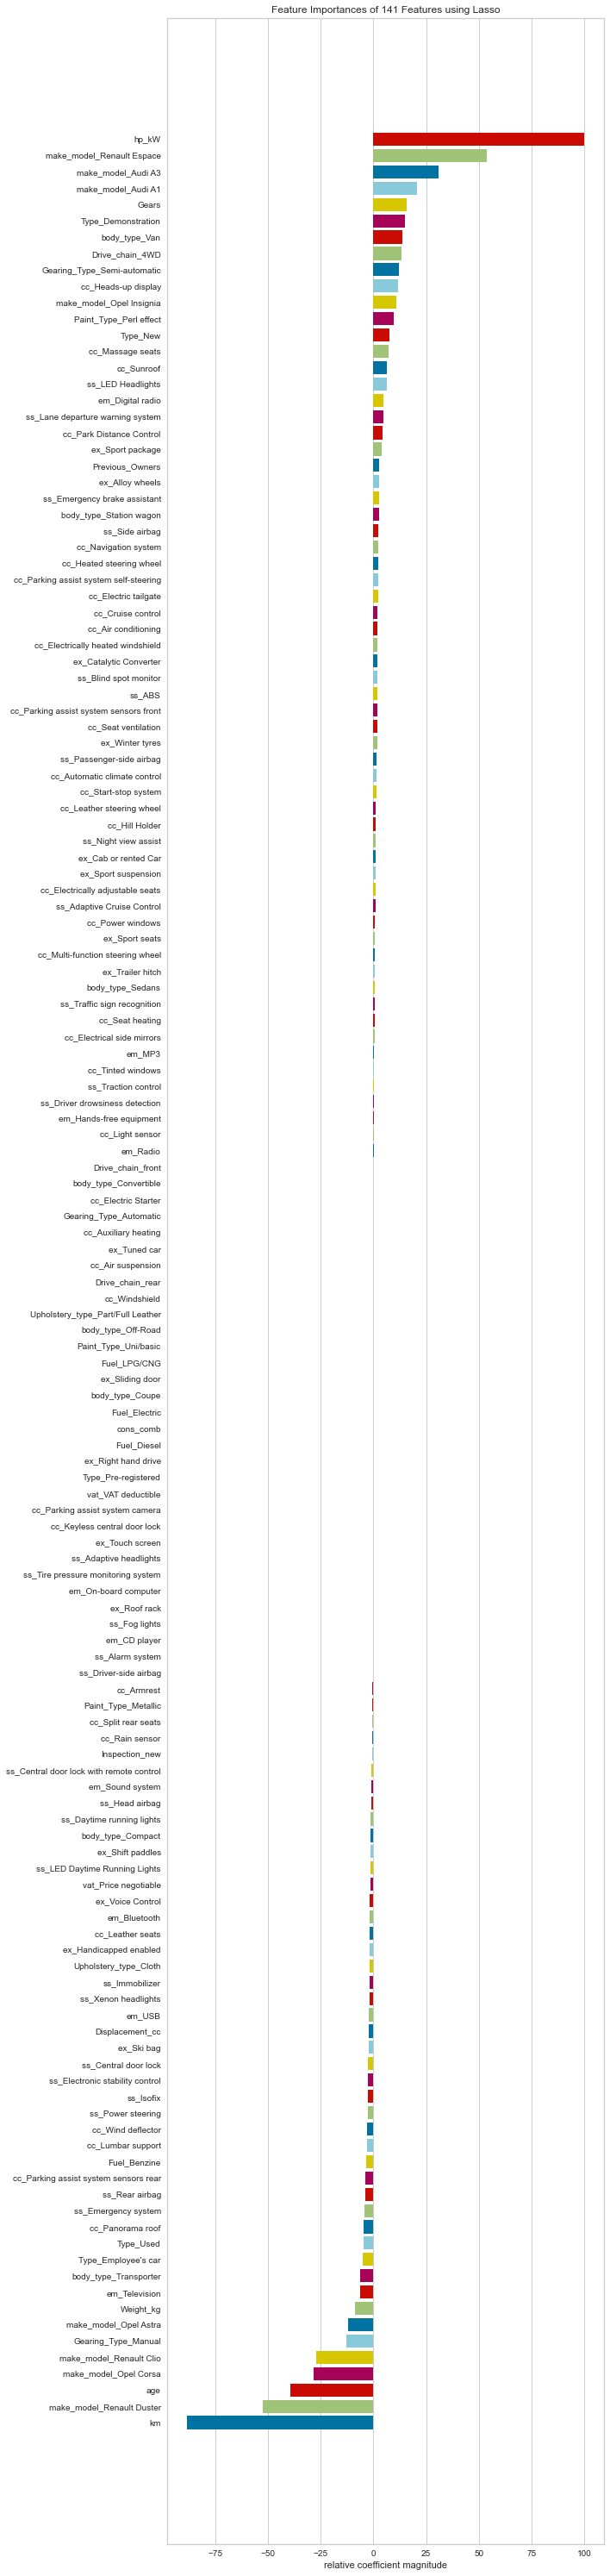

In [161]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=X_train.columns)
visualizer = RadViz(size = (720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [162]:
# Yukarıda lasso sonrası feature'ların coefficient'larına göre önemini görüyoruz.
# Burdan sonra  belli birkaç feature seçerek yeni df oluşturacam ve bu feature'lar ile ne puan alıyorum ona bakacam.
# Amacımız en az feature ile en iyi skoru almak.

### Create New Data Frame and Evaluate it

In [163]:
df_new = df3[["make_model", "hp_kW", "km", "age", "price", "Gearing_Type", "Gears"]]
df_new

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000
...,...,...,...,...,...,...,...
15416,Renault Espace,147.000,1647.363,0.000,39950,Automatic,6.000
15417,Renault Espace,165.000,9900.000,0.000,39885,Automatic,7.000
15418,Renault Espace,146.000,15.000,0.000,39875,Automatic,6.000
15419,Renault Espace,147.000,10.000,0.000,39700,Automatic,6.000


In [164]:
X = df_new.drop(columns = ["price"])
y = df_new["price"]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [166]:
X_train, X_test = trans_2(X_train, X_test)

In [167]:
X_train

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
15048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,118.000,20.000,1.000,6.000
9137,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,12099.000,1.000,6.000
7458,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,81.000,23950.000,1.000,6.000
7707,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,66.000,50.000,0.000,5.000
5919,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,77.000,38397.000,3.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,100.000,49990.000,1.000,6.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,92.000,1647.363,0.000,6.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,26650.000,1.000,5.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,15577.000,1.000,5.000


In [168]:
X_test

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
5596,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,85.000,43.000,0.000,6.000
1493,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,66.000,20407.000,1.000,5.000
4049,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,85.000,41000.000,1.000,6.000
2636,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,110.000,91086.000,3.000,7.000
5497,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,85.000,50.000,0.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12791,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,88.000,53332.000,3.000,6.000
3813,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,28100.000,1.000,7.000
11442,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,100.000,16300.000,2.000,6.000
14193,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,55.000,1647.363,0.000,5.000


In [169]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.877,0.879
mae,1661.974,1598.365
mse,5515428.029,4929899.585
rmse,2348.495,2220.338


##### Cross Validate

In [171]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)

In [173]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                                   0.877
test_neg_mean_absolute_error          -1664.340
test_neg_mean_squared_error        -5534839.909
test_neg_root_mean_squared_error      -2349.421
dtype: float64

##### GridSearch

In [174]:
lasso_model = Lasso()

param_grid = {"alpha" : alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model, param_grid= param_grid,
                                 scoring="neg_root_mean_squared_error",
                                 cv = 10, n_jobs= -1)

In [175]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [176]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [177]:
lasso_final_model.best_score_

-2349.316653367573

In [178]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.877,0.879
mae,1663.261,1599.079
mse,5514726.982,4930287.588
rmse,2348.346,2220.425


In [181]:
2220 / df_new.price.mean()

0.12692650462271016

In [182]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### 7. Visually Compare Models Performanc in a Graph

In [186]:
scores ={
    "linear_model" : {"r2_score" : linear_model_2_R2, "mae" : linear_model_2_mae, "rmse": linear_model_2_rmse},
    "ridge_model" :{"r2_score" : ridge_model_R2, "mae" : ridge_model_mae, "rmse" : ridge_model_rmse},
    "lasso_model" : {"r2_score" : lasm_R2, "mae" : lasm_mae, "rmse" : lasm_rmse},
    "elastic_model" : {"r2_score" : em_R2, "mae" : em_mae, "rmse" : em_rmse},
    "final_model" : {"r2_score" : fm_R2, "mae" : fm_mae, "rmse" : fm_rmse}
}

scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_model,0.903,1429.305,1989.880
ridge_model,0.903,1428.793,1989.871
lasso_model,0.903,1428.890,1987.284
elastic_model,0.903,1428.890,1987.284
final_model,0.879,1599.079,2220.425


In [187]:
# Burada final_model'de sadece 6 feature kullanarak % 87.9 puan aldık.
# Diğerlerinde 141 feature da kullanılarak hesaplama yapıldı.
# Burada 2 puanlık taviz verilerek final_model seçilebilir. Daha az maliyetli olur.
# Ancak bu müşterinin talebine ve domain'e bağlıdır.

In [188]:
for i, j in enumerate(scores):
    print(i, j)

0 r2_score
1 mae
2 rmse


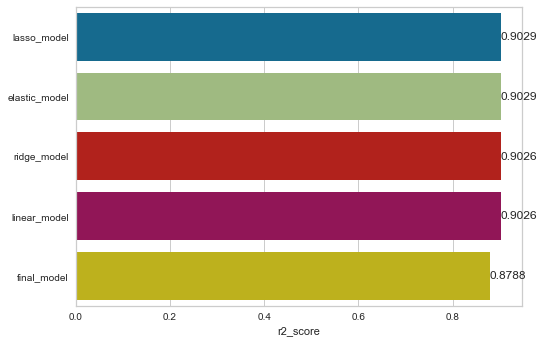

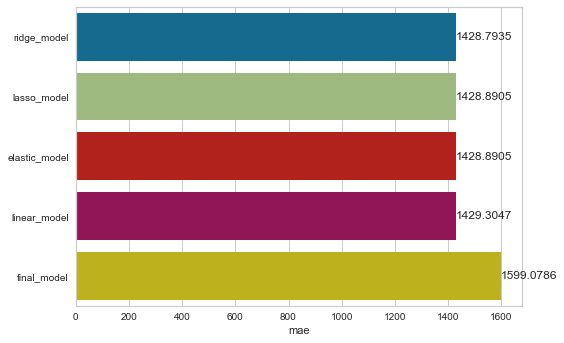

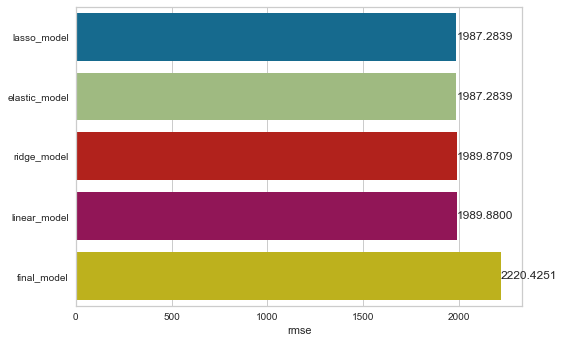

In [189]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

#####  Prediction New Observation

In [190]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [191]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000


In [192]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [193]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_cat = pd.DataFrame(enc.fit_transform(X[cat]), index = X.index, 
                           columns = enc.get_feature_names_out(cat))

X = X_cat.join(X)
X.drop(columns = cat, inplace=True)
X

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,56013.000,3.000,7.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,141.000,80000.000,2.000,7.000
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,83450.000,3.000,7.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,73000.000,3.000,6.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,16200.000,3.000,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,1647.363,0.000,6.000
15417,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,165.000,9900.000,0.000,7.000
15418,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,146.000,15.000,0.000,6.000
15419,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,10.000,0.000,6.000


In [194]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [195]:
final_model = Lasso(alpha=0.01)

In [196]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [198]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

# Burada belli özellikler girdik ve model bize bu özelliklere sahip aracın fiyatının ne olabileceğini gösterecek.

In [200]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,66,2,17000,7,Audi A3,Automatic


In [201]:
onehot = pd.DataFrame(enc.transform(new_obs[cat]), index=new_obs.index,
                           columns = enc.get_feature_names_out(cat))
new_obs = onehot.join(new_obs)
new_obs.drop(columns = cat, inplace=True)
new_obs

# Eğitim scale edilmiş data ile yapılmışsa, prediction alacağımız gözlem de scale edilmeli 
# Aksi takdirde sonuçlarımız yanlış çıkar.

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,age,km,Gears
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66,2,17000,7


In [203]:
new_obs = new_obs.reindex(columns=X.columns)
new_obs

# Yeni gelen gözlemdeki verileri reindex yapıyoruz ki veriler modeldeki sıralamayla uyuşsun.

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66,17000,2,7


In [204]:
new_obs = final_scaler.transform(new_obs)
new_obs

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.13065327, 0.05362776, 0.66666667, 0.66666667]])

In [205]:
final_model.predict(new_obs)
# my_dict içinde belirttiğimiz özelliklere sahip aracın fiyatı 19.600 euro imiş.
# Audi A3, otomatik 7 vites, 2 yaşında, 66 hp, ve 17000 km.

array([19601.81105318])

## Pipeline

In [206]:
X = df_new.drop(columns= ["price"])
y = df_new["price"]

In [207]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [208]:
X.head(1)

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000


In [210]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                        remainder=MinMaxScaler())

# column_trans : cat içinde belirttiğimiz  kategorik feature'lara önce One hot encoding uygula,
              #  remainder ile cat haricinde kalan tüm feature'lara Minmaxscale uygula talilmatı verdik.
    
# handle_unknown : kuracağımız pipeline işlem yaptığımız kategorik veya numeric veriler haricinde farklı bir gözlem
                 # ile karşılaşırsa verilen değeri ignore ederek tahmin verecek.
                 # Yani diyelim ki kullanıcı modelde olmayan bir feature olarak rengi de belirtti. model bunu ignore edecek.

In [212]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder and Scale", column_trans), ("Lasso", Lasso(alpha = 0.01))] # lasso için best alpha = 0.01 idi.

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder and Scale',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])])),
                ('Lasso', Lasso(alpha=0.01))])

In [215]:
my_dict = {
    "hp_kW": 90,
    "age": 0,
    "km": 33000,
    "Gears": 6,
    "make_model": 'Audi A1',
    "Gearing_Type": "Automatic"
    
}

In [216]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,90,0,33000,6,Audi A1,Automatic


In [217]:
pipe_model.predict(new_obs)

array([23122.24231899])

##### Cross Validate with Pipeline

In [219]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [220]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000


In [221]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [224]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder and scale", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder and scale',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])])),
                ('Lasso', Lasso())])

In [225]:
pipe_model.predict(new_obs)

array([23140.37795997])

In [226]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.877,0.879
mae,1661.974,1598.365
mse,5515428.029,4929899.585
rmse,2348.495,2220.338


In [227]:
operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.877
test_neg_mean_absolute_error          -1664.391
test_neg_mean_squared_error        -5535043.375
test_neg_root_mean_squared_error      -2349.466
dtype: float64

### Notes :
1. Get_dummies' i çok olan bir data'da scaling yapınca dummy feature'lar baskın geliyor bu yüzde de score'larda saçma sonuçlar çıkabiliyor.
2. Ridge ve Lasso multicollinearity ve overfitting ile mücadele eder. Hatta Lasso feature selection'da bazı featureları attığı için daha çok tercih edilir.
3. Linear Regression arkaplanda OLS çalıştırdığı için dummy'li feature'lar normalization sonrası baskın çıkıyor. Ancak Ridge ve Lasso arkaplanda Gradient Descent çalşıtırdığı için bu durumla başa çıkabiliyor.